# Tesla Stock Prediction using LSTM Model

In [229]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Getting the Price values of Tesla from last 7 years.

In [230]:
tesla = yf.download(tickers='TSLA', period='3y', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [231]:
tesla = tesla.reset_index()['Close']

Let's plot the stock price values of Tesla.

In [232]:
tesla_plot = px.line(tesla, y="Close",width=1000, height=650)
tesla_plot.show()

Data Normalization: Data standardization is the concept of rescaling the values so that they have mean as 0, and variance as 1. The aim behind this is to have all features as common values so that there is no distortion in the range of values. MinMaxScaler() is used for this. We are setting the minmaxscaler range to 0,1 with the function MinMaxScaler(). So all the values of the features will be reshaped into the range of 0 to 1.

In [233]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
tesla = scaler.fit_transform(np.array(tesla).reshape(-1,1))

Train-Test Split

In [234]:
training_data_size = int(len(tesla)*0.7)
test_data_size = len(tesla)-training_data_size
train_data = tesla[0:training_data_size,:]
test_data = tesla[training_data_size:len(tesla),:1]

In [235]:
training_data_size, test_data_size

(529, 228)

Converting an array of values into a dataset matrix.

In [236]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]    
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

Reshaping into X=t,t+1,t+2,t+3 (independent values) and Y=t+4.

In [237]:
time_step = 100                                          ###.    x_train,y_train        x_test,y_test
X_train, y_train = create_dataset(train_data, time_step) ###i=0, 0,1,2,3-----99         100
X_test, y_test = create_dataset(test_data, time_step)

In [238]:
X_train.shape, y_train.shape

((428, 100), (428,))

In [239]:
X_test.shape, y_test.shape

((127, 100), (127,))

Reshaping for LSTM Model input to be [samples, time steps, features].

In [240]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

Stacked LSTM model

In [241]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [242]:
from keras.layers import Dropout

In [246]:
model_tesla = Sequential()
model_tesla.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model_tesla.add(Dropout(0.2))
model_tesla.add(LSTM(50,return_sequences=True))
model_tesla.add(Dropout(0.2))
model_tesla.add(LSTM(50))
model_tesla.add(Dropout(0.2))
model_tesla.add(Dense(1))
model_tesla.compile(loss='mean_squared_error',optimizer='adam')

In [247]:
model_tesla.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_21 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_27 (LSTM)              (None, 100, 50)           20200     
                                                                 
 dropout_22 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_28 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_23 (Dropout)        (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 1)               

In [248]:
model_tesla.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100


2022-10-06 23:42:04.077458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-06 23:42:04.315967: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-06 23:42:04.486474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-06 23:42:04.646080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-06 23:42:04.820437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-06 23:42:05.066894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-06 23:42:05.313546: I tensorflow/core/grappler/optimizers/cust

14/14 [==============================] - ETA: 0s - loss: 0.0457

2022-10-06 23:42:07.474518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-06 23:42:07.557385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-06 23:42:07.676154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-06 23:42:07.793761: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 5s 208ms/step - loss: 0.0457 - val_loss: 0.0255
Epoch 2/100
14/14 [==============================] - 1s 67ms/step - loss: 0.0088 - val_loss: 0.0055
Epoch 3/100
14/14 [==============================] - 1s 62ms/step - loss: 0.0050 - val_loss: 0.0064
Epoch 4/100
14/14 [==============================] - 1s 62ms/step - loss: 0.0043 - val_loss: 0.0070
Epoch 5/100
14/14 [==============================] - 1s 62ms/step - loss: 0.0041 - val_loss: 0.0050
Epoch 6/100
14/14 [==============================] - 1s 61ms/step - loss: 0.0041 - val_loss: 0.0046
Epoch 7/100
14/14 [==============================] - 1s 62ms/step - loss: 0.0040 - val_loss: 0.0044
Epoch 8/100
14/14 [==============================] - 1s 62ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 9/100
14/14 [==============================] - 1s 61ms/step - loss: 0.0037 - val_loss: 0.0070
Epoch 10/100
14/14 [==============================] - 1s 61ms/step - loss: 0.0032 - val_loss: 0.0040
Epoch 11/1

In [249]:
import tensorflow as tf

Prediction and checking the Performance matrix

In [250]:
train_predict = model_tesla.predict(X_train)
test_predict = model_tesla.predict(X_test)

2022-10-06 23:46:18.634934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-06 23:46:18.712310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-06 23:46:18.863468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-06 23:46:18.993290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 109ms/step


Inverse Transform to original form.

In [251]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

Calculating RMSE (Root mean squared error) of y_train and y_test

In [252]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

180.62787608898984

In [253]:
math.sqrt(mean_squared_error(y_test,test_predict))

251.387884262084

Shifting the train and test predictions for plotting.

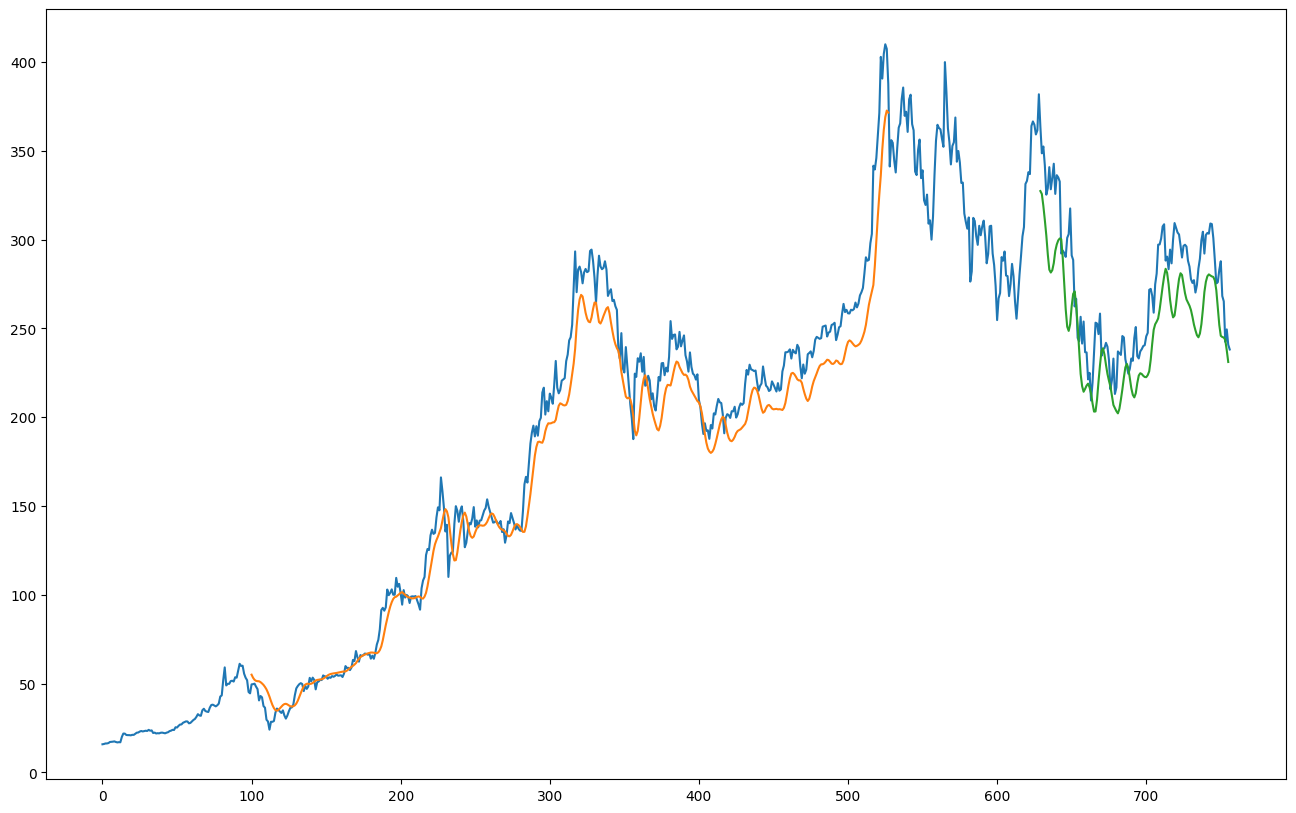

In [255]:
look_back = 100
trainPredictPlot = np.empty_like(tesla)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(tesla)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(tesla)-1, :] = test_predict

plt.figure(figsize=(16,10))
plt.plot(scaler.inverse_transform(tesla))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [256]:
len(test_data)

228

In [257]:
x_input=test_data[128:].reshape(1,-1)
x_input.shape

(1, 100)

In [258]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [259]:
temp_input[:5]

[0.5724335726576216,
 0.6039297338113276,
 0.5601192829218598,
 0.5597894234309688,
 0.5212903685151904]

For prediction of next 10 days.

In [260]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<50):
    
    if(len(temp_input)>100):
        
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model_tesla.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_tesla.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output[:10])

[0.5164731]
101
1 day input [0.60392973 0.56011928 0.55978942 0.52129037 0.53059372 0.49106285
 0.51697699 0.55836011 0.60225515 0.60109643 0.58596575 0.61525452
 0.55482481 0.56437346 0.56591277 0.57347387 0.56799332 0.54902288
 0.50717459 0.52025007 0.5509766  0.50048464 0.50977107 0.56121878
 0.55880836 0.5562288  0.58321704 0.58122104 0.55012237 0.53953346
 0.529342   0.53642105 0.55114575 0.54776272 0.58026534 0.59604725
 0.55438503 0.55115423 0.56122722 0.56445806 0.56890675 0.57012463
 0.58276878 0.58776724 0.64918646 0.65054817 0.64088104 0.61659076
 0.65708589 0.67251256 0.71374344 0.71406486 0.72246327 0.73974218
 0.74287995 0.69095867 0.696676   0.67868666 0.70665595 0.68705123
 0.72105084 0.74462224 0.73762775 0.73111542 0.72825672 0.71251708
 0.69538196 0.71197583 0.71360817 0.71100321 0.69075564 0.68245875
 0.66439329 0.65909029 0.66302313 0.64538897 0.656071   0.679617
 0.6937243  0.72016277 0.73218956 0.7010063  0.727597   0.73048954
 0.72947464 0.74398792 0.74312525 0.

In [262]:
day_new = np.arange(1,101)
day_pred = np.arange(101,151)

In [263]:
len(tesla)

757

Plotting the FINAL results

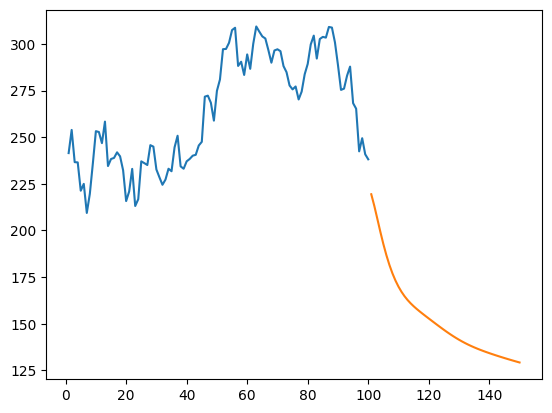

In [265]:
plt.plot(day_new,scaler.inverse_transform(tesla[657:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

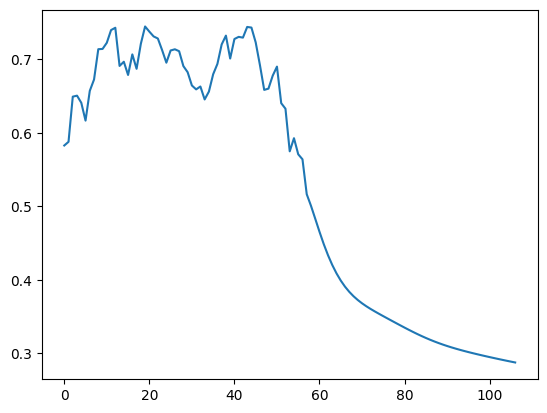

In [266]:
new_tesla = tesla.tolist()
new_tesla.extend(lst_output)
plt.plot(new_tesla[700:])

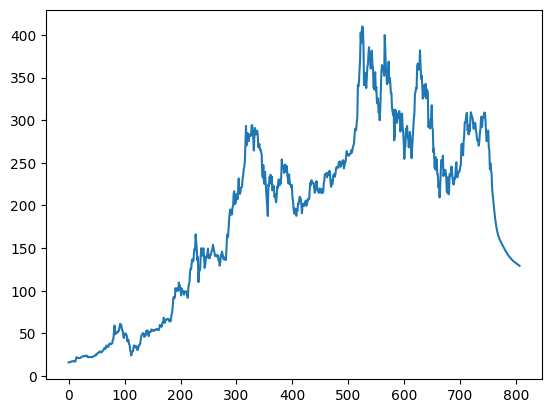

In [267]:
new_tesla=scaler.inverse_transform(new_tesla).tolist()
plt.plot(new_tesla)